In [1]:
from __future__ import division
from __future__ import print_function
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
from pandas.io.pytables import IndexCol
from pandas.core.frame import DataFrame
from requests.api import head
from sklearn import svm
from numpy import newaxis
from pip.req.req_file import preprocess
from mistune import preprocessing
from sklearn.linear_model.base import LinearRegression
sns.set()
sns.set_palette('pastel')

%cd ..

In [2]:
data = pd.read_csv('./Documents/workspace/old/raw_data_number.csv', header=0, encoding='cp949')
print(data.tail())


        code   gu  dong  disable  fire  bank  seniorcenter  movingin  \
418  강동구둔촌1동  강동구  둔촌1동      455    10     2             8      2849   
419  강동구둔촌2동  강동구  둔촌2동     1003    13     7             5      4076   
420  강동구암사1동  강동구  암사1동     1617    15     4             3      6099   
421  강동구천호2동  강동구  천호2동     1847    29     7            13      5960   
422    강동구길동  강동구    길동     1950    37     9            15      7373   

     movingout  older  older2013  
418       3050    665        727  
419       4385    453        502  
420       6374    821        880  
421       6265    186        199  
422       7939    508        547  


/Users/DS/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


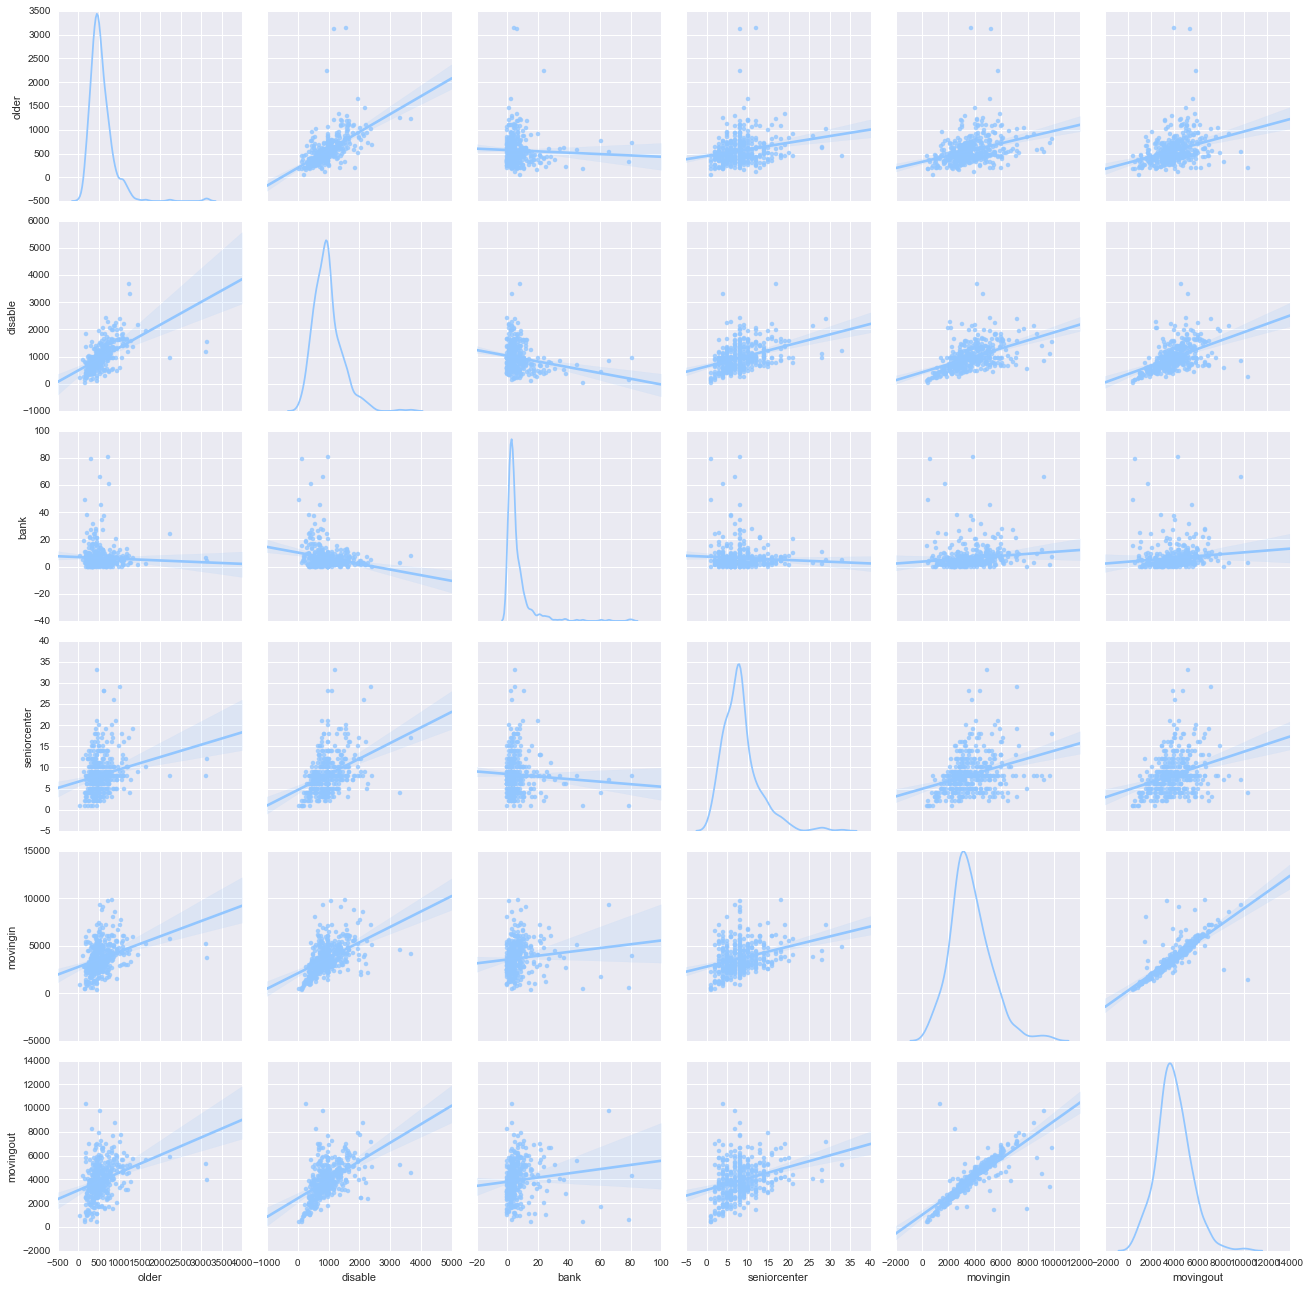

In [3]:
# 눈으로 자료의 관계성 확인
# 질문? plt 조절
sns.pairplot(data, diag_kind="kde", kind="reg" ,vars = ['older', 'disable', 'bank', 'seniorcenter', 'movingin', 'movingout'], size=3)
plt.show()

x,y 정해주기

In [4]:
y = data['older']
y2 = data['older2013']
x = data.drop(labels = ['code', 'gu', 'dong', 'older', 'older2013'], axis=1)

               disable      fire      bank  seniorcenter  movingin  movingout  \
disable       1.000000  0.185589 -0.209666      0.380607  0.488196   0.489488   
fire          0.185589  1.000000  0.489940      0.075529  0.411065   0.429240   
bank         -0.209666  0.489940  1.000000     -0.061527  0.119592   0.109945   
seniorcenter  0.380607  0.075529 -0.061527      1.000000  0.308768   0.295052   
movingin      0.488196  0.411065  0.119592      0.308768  1.000000   0.824094   
movingout     0.489488  0.429240  0.109945      0.295052  0.824094   1.000000   
older         0.562763  0.251880 -0.042128      0.201830  0.323813   0.311607   
older2013     0.748737  0.287850 -0.075903      0.293232  0.405319   0.414577   

                 older  older2013  
disable       0.562763   0.748737  
fire          0.251880   0.287850  
bank         -0.042128  -0.075903  
seniorcenter  0.201830   0.293232  
movingin      0.323813   0.405319  
movingout     0.311607   0.414577  
older         1.00

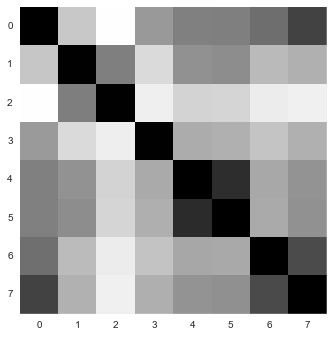

In [5]:
# correlation 확인
print(data.corr())
plt.imshow(data.corr(), interpolation="none")
plt.grid(False)
plt.show()

In [6]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize
x_scale = pd.DataFrame(scale(x), index = x.index, columns = x.columns)
x_scale_norm = pd.DataFrame(normalize(x_scale), columns = x.columns)

In [7]:
x_scale_norm.tail()

,disable,fire,bank,seniorcenter,movingin,movingout
418,-0.733824,-0.281364,-0.312013,-0.039266,-0.358154,-0.393915
419,0.098034,-0.075450,0.089695,-0.862092,0.307550,0.372642
420,0.477991,0.059537,-0.085044,-0.397464,0.533508,0.564038
421,0.530854,0.515050,0.021055,0.293519,0.412907,0.442526
422,0.402863,0.531028,0.055482,0.283710,0.454244,0.515562


      disable      fire      bank  seniorcenter  movingin  movingout  older
418 -0.733824 -0.281364 -0.312013     -0.039266 -0.358154  -0.393915    665
419  0.098034 -0.075450  0.089695     -0.862092  0.307550   0.372642    453
420  0.477991  0.059537 -0.085044     -0.397464  0.533508   0.564038    821
421  0.530854  0.515050  0.021055      0.293519  0.412907   0.442526    186
422  0.402863  0.531028  0.055482      0.283710  0.454244   0.515562    508


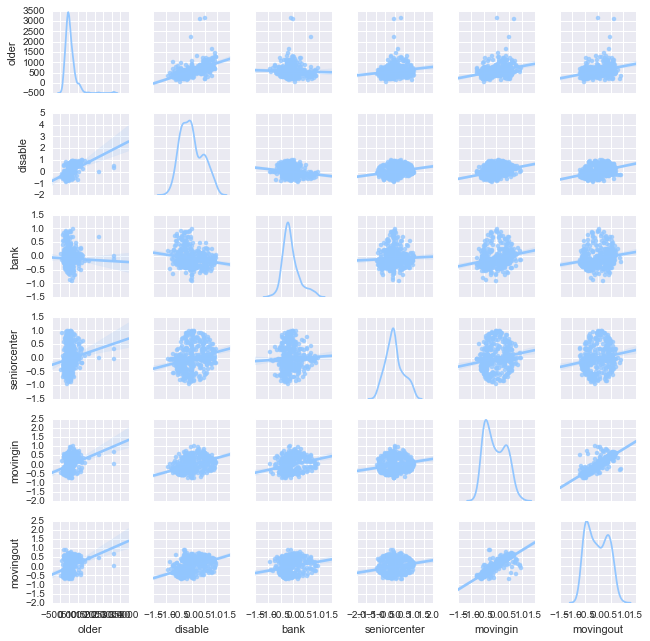

In [8]:
#scaling => normalize 된 것의 pairplot을 위해 잠시 y를 붙인 x_test를 만듦
x_test = pd.concat([x_scale_norm, y], axis=1)
print(x_test.tail())
sns.pairplot(x_test, diag_kind="kde", kind="reg" ,vars = ['older', 'disable', 'bank', 'seniorcenter', 'movingin', 'movingout'], size=1.5)
plt.show()

In [9]:
import statsmodels.api as sm

In [26]:
model_OLS = sm.OLS(y,x_scale_norm) 
result_OLS = model_OLS.fit()
print(result_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                  older   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     9.597
Date:                Thu, 25 Feb 2016   Prob (F-statistic):           6.75e-10
Time:                        22:15:08   Log-Likelihood:                -3308.1
No. Observations:                 423   AIC:                             6628.
Df Residuals:                     417   BIC:                             6653.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
disable        261.7476     85.699      3.054   

In [27]:
# 3-2 intercept 추가

x_intercept = sm.add_constant(x_scale_norm)
model_OLS = sm.OLS(y,x_intercept) 
result_OLS = model_OLS.fit()
print(result_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                  older   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     33.42
Date:                Thu, 25 Feb 2016   Prob (F-statistic):           6.86e-33
Time:                        22:15:08   Log-Likelihood:                -2942.4
No. Observations:                 423   AIC:                             5899.
Df Residuals:                     416   BIC:                             5927.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const          577.2075     13.143     43.917   

In [28]:
x_intercept = x_intercept.drop(labels = ['bank', 'movingout', 'seniorcenter', 'movingin'], axis=1)
model_OLS = sm.OLS(y,x_intercept) 
result_OLS = model_OLS.fit()
print(result_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                  older   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     99.82
Date:                Thu, 25 Feb 2016   Prob (F-statistic):           3.42e-36
Time:                        22:15:08   Log-Likelihood:                -2943.3
No. Observations:                 423   AIC:                             5893.
Df Residuals:                     420   BIC:                             5905.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        575.9826     12.628     45.613      0.0

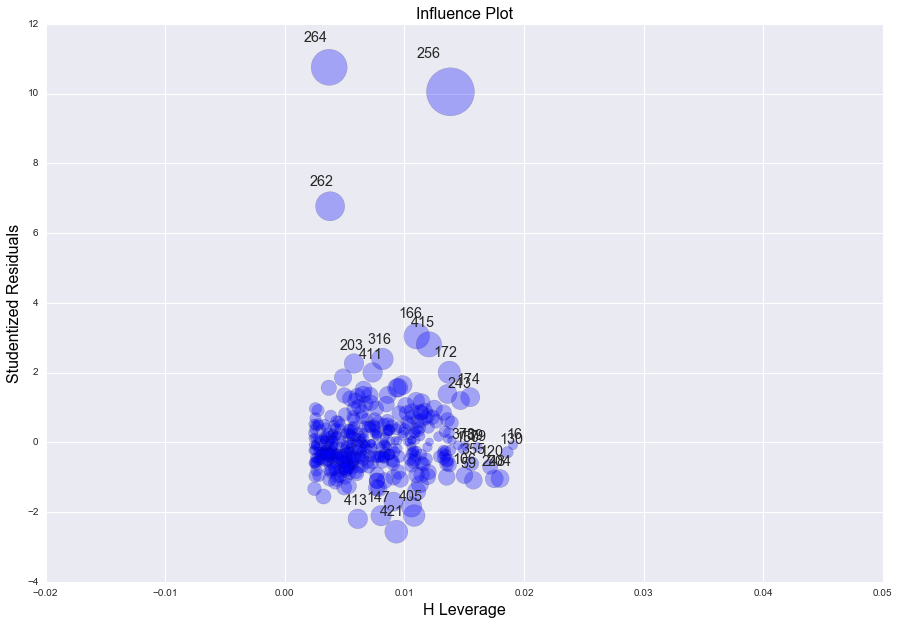

In [13]:
fig, ax = plt.subplots(figsize=(15, 10))
sm.graphics.influence_plot(result_OLS, plot_alpha=0.3, ax=ax)
plt.show()

# Outlier

# Outlier를 feature selecting 전에 할 수도 있다.

In [14]:
idx_outlier = np.nonzero(result_OLS.outlier_test().ix[:, -1].abs() < 0.01)[0]
idx_outlier

array([256, 262, 264])

In [15]:
print(data.ix[[264, 262, 256]])

        code   gu  dong  disable  fire  bank  seniorcenter  movingin  \
264  구로구구로5동  구로구  구로5동     1169    13     6             8      5218   
262  구로구구로3동  구로구  구로3동      944    19    24             8      5758   
256  강서구방화2동  강서구  방화2동     1548    30     4            12      3745   

     movingout  older  older2013  
264       5304   3115        870  
262       5872   2237        596  
256       3946   3146        954  


 # Outlier 제거 후 Regression

In [31]:
x_intercept_out = x_intercept.drop(idx_outlier)
y_out = y.drop(idx_outlier)
model_OLS_out = sm.OLS(y_out, x_intercept_out)
result_OLS_out = model_OLS_out.fit()
print(result_OLS_out.summary())

                            OLS Regression Results                            
Dep. Variable:                  older   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     171.8
Date:                Thu, 25 Feb 2016   Prob (F-statistic):           3.80e-55
Time:                        22:16:11   Log-Likelihood:                -2772.9
No. Observations:                 420   AIC:                             5552.
Df Residuals:                     417   BIC:                             5564.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        558.1731      8.886     62.812      0.0

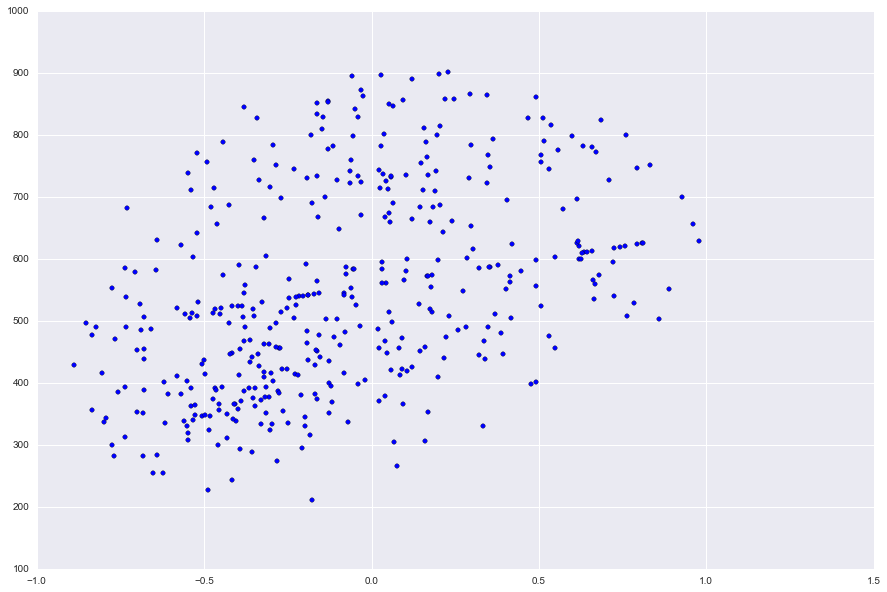

In [17]:
# R-square 눈으로 확인하기
fig, ax = plt.subplots(figsize=(15, 10))
plt.scatter(x_intercept_out.ix[:, -1], result_OLS_out.fittedvalues)
plt.show()

# Closs-validation(K-Fold) 

In [18]:
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold

x_out = x_scale_norm.drop(idx_outlier)
print("r2_score : " , cross_val_score(LinearRegression(), x, y, "r2", KFold(len(x_scale_norm))))
print("mean_squared_error : " , cross_val_score(LinearRegression(), x, y, "mean_squared_error", KFold(len(x_scale_norm))))

r2_score :  [ 0.60689608  0.19953582 -0.09527471]
mean_squared_error :  [ -21582.84636227 -138513.92484653  -45361.77459546]


# SVR(Support Vector Regression)

In [35]:
# SVR(Support Vector Regression), Radial Basis Function (RBF) kernel SVM #########################
print("\n ##Support Vector Regression Score##")
from sklearn.svm import SVR
svr_linear = SVR(kernel='linear')
svr_poly = SVR(kernel='poly')
svr_sigmoid = SVR(kernel='sigmoid')
svr_rbf = SVR(kernel='rbf')

x_out = x.drop(idx_outlier)
y_out = y.drop(idx_outlier)
y2_out = y2.drop(idx_outlier)

score_l = svr_linear.fit(x_out, y_out).score(x_out ,y_out)
print("SVR_linear model(score)  : ", score_l)


 ##Support Vector Regression Score##
SVR_linear model(score)  :  0.484704058057


In [36]:
score_s = svr_sigmoid.fit(x_out, y_out).score(x_out ,y_out)
score_r = svr_rbf.fit(x_out, y_out).score(x_out ,y_out)

print("SVR_sigmoid model(score) : ", score_s)
print("SVR_rbf model(score)     : ", score_r)

SVR_sigmoid model(score) :  -0.0385204174347
SVR_rbf model(score)     :  -0.0320328319212


In [ ]:
# 갑자기 이곳에서 무한루프?????????????
# score_p = svr_poly.fit(x_out, y_out).score(x_out ,y_out)
# print("SVR_poly model(score)    : ", score_p)

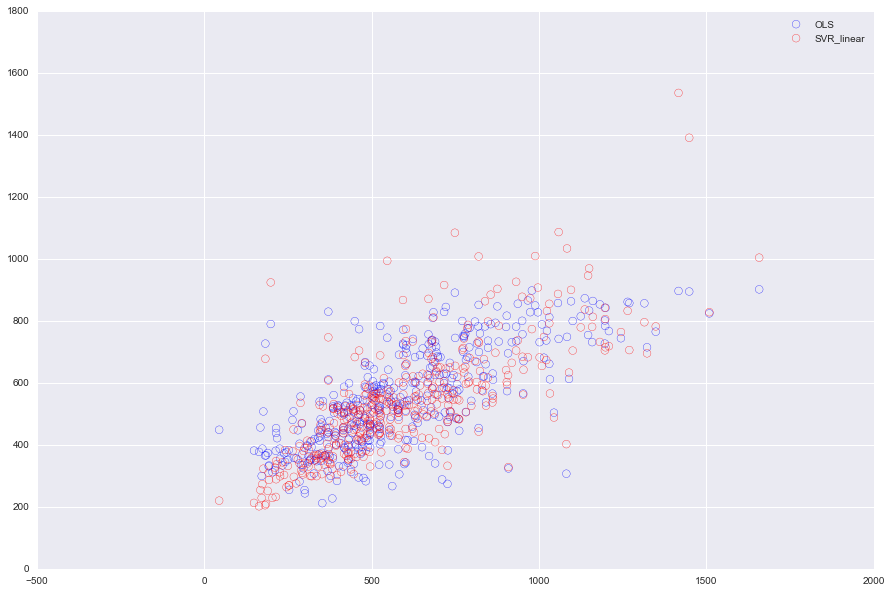

In [21]:
predictions_OLS = result_OLS_out.predict()
predictions_SVR = svr_linear.fit(x_out, y_out).predict(x_out)

fig, ax = plt.subplots(figsize=(15, 10))
plt.scatter(y2_out, predictions_OLS, marker='o', facecolors='none', edgecolors='b', s=60, label='OLS')
plt.scatter(y2_out, predictions_SVR, marker='o', facecolors='none', edgecolors='r', s=60, label='SVR_linear')
plt.legend()
plt.show()

# TEST

In [22]:
# sns.jointplot("older", "older2013", data=data, kind="reg", color="r", size=8)
# plt.show()

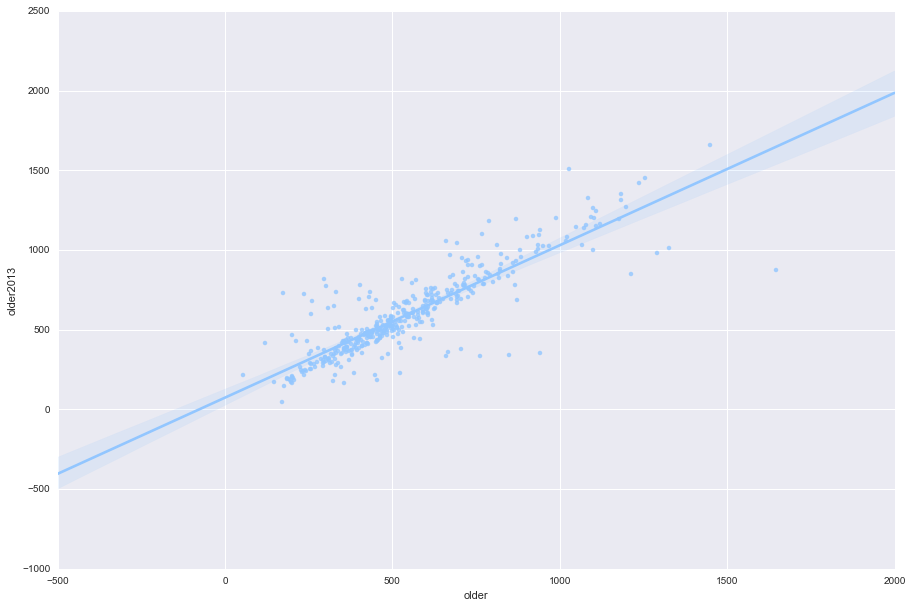

In [23]:
data_out = data.drop(idx_outlier)
fig, ax = plt.subplots(figsize=(15, 10))
sns.regplot("older", "older2013", data=data_out)
# Size of the confidence interval used when plotting a central tendency for discrete values of x. If “ci”, defer to the value of the``ci`` parameter.
plt.show()

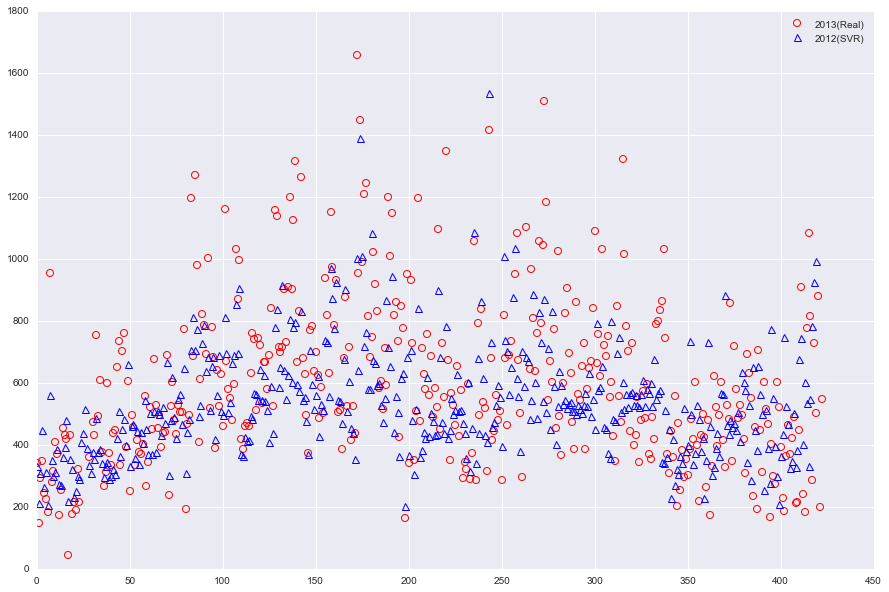

In [24]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(y2_out, 'o', markersize=7, markeredgewidth=1, markeredgecolor='r', markerfacecolor='None', label="2013(Real)")
plt.plot(predictions_SVR, 'r^', markersize=7, markeredgewidth=1, markeredgecolor='b', markerfacecolor='None', label="2012(SVR)")
plt.legend()
plt.show()

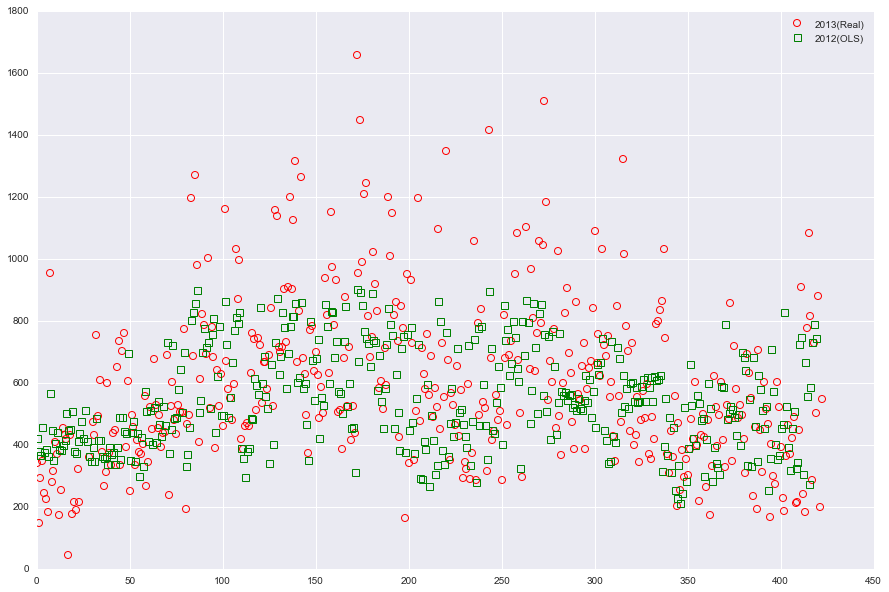

In [25]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(y2_out, 'o', markersize=7, markeredgewidth=1, markeredgecolor='r', markerfacecolor='None', label="2013(Real)")
plt.plot(predictions_OLS, 's', markersize=7, markeredgewidth=1, markeredgecolor='g', markerfacecolor='None', label="2012(OLS)")

plt.legend()
plt.show()

궁금증
1. Regulize
2. Test&Validation
3. infinite roof in SVR (kernel = poly)?